In [1]:
import datetime
import math
import csv

import sys
sys.path.append('/home/mdandrea/Tools/python')
import pytimber
import statistics

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator
import matplotlib.mlab as mlab
import numpy as np
import scipy.optimize as opt
from scipy.special import erf
from scipy.stats import norm

In [2]:
def erfunc(x,a,b,c,d):
    return a+(b/2.0)*erf((x-c)/(d*np.sqrt(2.0)))

perc = 0

In [3]:
config  = 'B1H'
scan = str(1)

In [4]:
if (config == 'B1H'):
	sigma1 = 5.00
	blm_metadata = 'BLMTI.04L7.B1E10_TCSPM.B4L7.B1:LOSS_RS09'
	cry_metadata = 'BLMTI.04L7.B1E10_TCPCH.A4L7.B1:LOSS_RS09'
	lin_metadata = 'TCSPM.B4L7.B1:MEAS_MOTOR_LU'
	int_metadata = 'LHC.BCTFR.A6R4.B1:BEAM_INTENSITY'
	alpha1 = -2.047158749
	beta1 = 342.1745919
	phi1 = 46.31497157
	alpha2 = 1.386073112
	beta2 = 134.123512
	phi2 = 46.36222471
	center2 = 0.3
	param0 = [0.2,-2,5.5,1.0]
	param0_2 = [0.0,-1,65.0,0.1]
	meanlim = 1.5
	if (scan == '1'):
		tMin_bkg = '2022-07-22 16:18:19.000'
		tMax_bkg = '2022-07-22 16:19:47.000'
		tMin = '2022-07-22 16:23:40.000'
		tMax = '2022-07-22 16:36:12.000'
		norm_l1 = 1.35
		norm_l2 = 1.35
		maxfit = 4.0
	if (scan == '2'):
		tMin_bkg = '2022-05-09 19:59:15.000'
		tMax_bkg = '2022-05-09 19:59:25.000'
		tMin = '2022-05-09 19:59:40.000'
		tMax = '2022-05-09 20:01:01.000'
		norm_l1 = 6.88
		norm_l2 = 6.78
		maxfit = 8.0
if (config == 'B1V'):
	sigma1 = 4.86
	blm_metadata = 'BLMTI.04L7.B1E10_TCSG.D4L7.B1:LOSS_RS09'
	cry_metadata = 'BLMTI.06L7.B1E10_TCPCV.A6L7.B1:LOSS_RS09'
	lin_metadata = 'TCSG.D4L7.B1:MEAS_MOTOR_LU'
	int_metadata = 'LHC.BCTFR.A6R4.B1:BEAM_INTENSITY'
	alpha1 = -2.423802937
	beta1 = 255.7212085
	phi1 = 44.21375511
	alpha2 = 0.9016580719
	beta2 = 68.87110987
	phi2 = 44.28227085
#	center2 = -0.09
	center2 = 0
	param0 = [0.0,-1,3.5,0.01]
	meanlim = 1.5
	if (scan == '1'):
		tMin_bkg = '2022-06-03 05:11:30.000'
		tMax_bkg = '2022-06-03 05:11:50.000'
		tMin = '2022-06-03 05:12:05.000'
		tMax = '2022-06-03 05:20:58.000'
		norm_l1 = 0.795
		norm_l2 = 0.795
#		norm_l2 = -0.865
		maxfit = 1.5
	if (scan == '2'):
		tMin_bkg = '2022-06-03 05:35:15.000'
		tMax_bkg = '2022-06-03 05:35:45.000'
		tMin = '2022-06-03 05:38:10.000'
		tMax = '2022-06-03 05:45:54.000'
		norm_l1 = 0.865
		norm_l2 = 0.865
#		norm_l2 = -0.845
		maxfit = 1.5
if (config == 'B2H'):
	sigma1 = 5.0
	blm_metadata = 'BLMTI.04R7.B2I10_TCSPM.B4R7.B2:LOSS_RS09'
	cry_metadata = 'BLMTI.05R7.B2I10_TCPCH.A5R7.B2:LOSS_RS09'
	lin_metadata = 'TCSPM.B4R7.B2:MEAS_MOTOR_LU'
	int_metadata = 'LHC.BCTFR.A6R4.B2:BEAM_INTENSITY'
	alpha1 = -3.53174324
	beta1 = 201.602037
	phi1 = 16.13407932
	alpha2 = 1.472666489
	beta2 = 145.5463176
	phi2 = 16.18923504
	center2 = 0.0025
	param0 = [0.2,-2,4.0,1.0]
	param0_2 = [0.0,-1.0,35.0,1.0]
	meanlim = 1.5
	if (scan == '1'):
		tMin_bkg = '2022-08-11 16:10:05.000'
		tMax_bkg = '2022-08-11 16:10:18.000'
		tMin = '2022-08-11 16:10:18.000'
		tMax = '2022-08-11 16:13:03.000'
		norm_l1 = 1.252
		norm_l2 = 1.252
#		norm_l1 = -1.07
#		norm_l2 = -1.07
#		norm_l2 = -0.823
		maxfit = 2.5
if (config == 'B2V'):
	sigma1 = 5.0
	blm_metadata = 'BLMTI.04R7.B2I10_TCSG.D4R7.B2:LOSS_RS09'
	cry_metadata = 'BLMTI.06R7.B2I10_TCPCV.A6R7.B2:LOSS_RS09'
	lin_metadata = 'TCSG.D4R7.B2:MEAS_MOTOR_LU'
	int_metadata = 'LHC.BCTFR.A6R4.B2:BEAM_INTENSITY'
	alpha1 = -2.424056441
	beta1 = 255.7825714
	phi1 = 15.32905492
	alpha2 = 0.9019704719
	beta2 = 68.86474184
	phi2 = 15.39756527
	center2 = 0.045
#	center2 = 0
	param0 = [0.0,-1,3.8,0.1]
	param0_2 = [0.0,-1,50.0,0.1]
	meanlim = 1.5
	if (scan == '1'):
		tMin_bkg = '2022-08-11 16:23:18.000'
		tMax_bkg = '2022-08-11 16:23:27.000'
		tMin = '2022-08-11 16:23:27.000'
		tMax = '2022-08-11 16:26:52.000'
		norm_l1 = 1.065
		norm_l2 = 1.065
#		norm_l1 = -1.07
#		norm_l2 = -1.07
#		norm_l2 = -0.823
		maxfit = 2.0


In [5]:
iFilePlot = 'LinearScanPlot_'+config+'_'+scan+'.dat'
oBeamInt = 'BeamIntensityFit_'+config+'_'+scan+'.png'
oBLMNorm = 'BLMSignalNorm_'+config+'_'+scan+'.png'
oBLMFit = 'BLMSignalNormFit_'+config+'_'+scan+'_FT.png'
oScanNorm = 'LinearScanPlotNorm_'+config+'_'+scan+'.dat'
iFileName = 'timber_file'

In [7]:
lbd = pytimber.LoggingDB(source='nxcals', spark_session=spark)

In [8]:
Bkg_data = lbd.get(blm_metadata, tMin_bkg , tMax_bkg )
DeltaBLM_bkg = Bkg_data[blm_metadata][0]
BLM_bkg =  Bkg_data[blm_metadata][1]

25/05/08 10:06:41 INFO ContextHandler: Started o.s.j.s.ServletContextHandler@28399103{/SQL,null,AVAILABLE,@Spark}
25/05/08 10:06:41 INFO ContextHandler: Started o.s.j.s.ServletContextHandler@6338ab4d{/SQL/json,null,AVAILABLE,@Spark}
25/05/08 10:06:41 INFO ContextHandler: Started o.s.j.s.ServletContextHandler@d34b4ec{/SQL/execution,null,AVAILABLE,@Spark}
25/05/08 10:06:41 INFO ContextHandler: Started o.s.j.s.ServletContextHandler@3f913bb0{/SQL/execution/json,null,AVAILABLE,@Spark}
25/05/08 10:06:41 INFO ContextHandler: Started o.s.j.s.ServletContextHandler@196669a8{/static/sql,null,AVAILABLE,@Spark}


In [9]:
def datestring_to_timestamp_utc(date_string):
    # Parse the date string into a datetime object
    date_obj = datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S.%f') - timedelta(hours=2)
    
    # Convert the datetime object to UTC timezone if it's not already in UTC
    if date_obj.tzinfo is None or date_obj.tzinfo.utcoffset(date_obj) is None:
        date_obj = date_obj.replace(tzinfo=timezone.utc)
    else:
        date_obj = date_obj.astimezone(timezone.utc)
    
    # Extract the timestamp in seconds
    timestamp_utc = date_obj.timestamp()
    
    return timestamp_utc

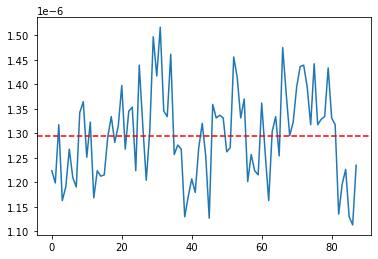

In [10]:
#BLM_bkg = signal[np.where((np.round(time) ==  datestring_to_timestamp_utc(tMin_bkg)))[0][0]:np.where((np.round(time) ==  datestring_to_timestamp_utc(tMax_bkg)))[0][0]]
#time_bkg = time[np.where((np.round(time) ==  datestring_to_timestamp_utc(tMin_bkg)))[0][0]:np.where((np.round(time) ==  datestring_to_timestamp_utc(tMax_bkg)))[0][0]]
DeltaBLM_bkg = np.array([i - DeltaBLM_bkg[0] for i in DeltaBLM_bkg])
bkg_mean = np.mean(BLM_bkg)

fig, ax = plt.subplots()
ax.plot(DeltaBLM_bkg, BLM_bkg)
ax.axhline(y=bkg_mean, color='r', linestyle='--')

In [11]:
Scan_data = lbd.get(blm_metadata, tMin, tMax)
DeltaBLM = Scan_data[blm_metadata][0]
SignalBLM =  Scan_data[blm_metadata][1]

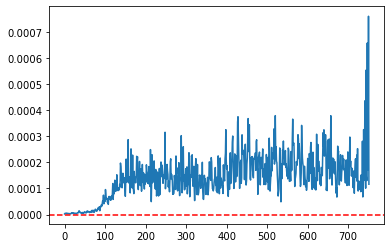

In [12]:
#BLM_scan = signal[np.where((np.round(time) ==  datestring_to_timestamp_utc(tMin)))[0][0]:np.where((np.round(time) ==  datestring_to_timestamp_utc(tMax)-1))[0][0]]
#time_scan = time[np.where((np.round(time) ==  datestring_to_timestamp_utc(tMin)))[0][0]:np.where((np.round(time) ==  datestring_to_timestamp_utc(tMax)-1))[0][0]]
DeltaBLM = np.array([i - DeltaBLM[0] for i in DeltaBLM])
SignalBLM = SignalBLM - bkg_mean

fig, ax = plt.subplots()
ax.plot(DeltaBLM, SignalBLM)
ax.axhline(y=0, color='r', linestyle='--')

In [13]:
lin_metadata

'TCSPM.B4L7.B1:MEAS_MOTOR_LU'

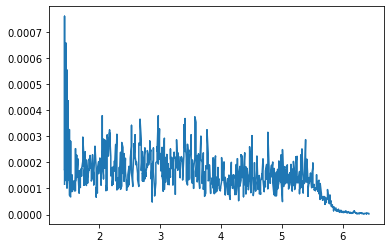

In [14]:
CollPos = lbd.get(lin_metadata, tMin , tMax )[lin_metadata][1]
fig, ax = plt.subplots()
ax.plot(CollPos, SignalBLM)
#ax.set_ylim(0, 0.00004)


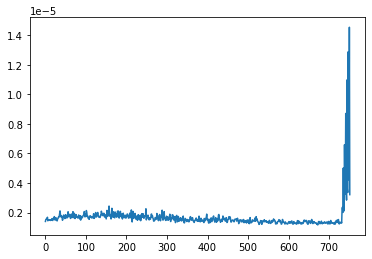

In [15]:
SignalCRY = lbd.get(cry_metadata, tMin, tMax )[cry_metadata][1]

plt.plot(DeltaBLM, SignalCRY)

In [16]:
int_metadata = 'LHC.BCTFR.A6R4.B1:BEAM_INTENSITY'
BeamInt = lbd.get(int_metadata, tMin, tMax )[int_metadata][1]

In [17]:
MeanCollPos = []
SignalBLMRedu = []
SignalBLMErr = []
SignalCRYRedu = []
BeamIntRedu = []
DeltaBLMRedu = []

i = 1

while i < len(CollPos):
    count = 1
    SumPos = CollPos[i-1]
    BLMmean = []
    CRYmean = []
    Intmean = []
    DeltaBLMmean = []
    BLMmean.append(SignalBLM[i-1])
    CRYmean.append(SignalCRY[i-1])
    Intmean.append(BeamInt[i-1])
    DeltaBLMmean.append(DeltaBLM[i-1])

    # if the absorber stays in the same position for more than one measurement, compoute the mean of the signals
    while CollPos[i] == CollPos[i-1]:
        
        count += 1
        SumPos += CollPos[i]
        BLMmean.append(SignalBLM[i])
        CRYmean.append(SignalCRY[i])
        Intmean.append(BeamInt[i])
        DeltaBLMmean.append(DeltaBLM[i])
        i = i+1
        if i == len(CollPos):
            break
    print(count)
        
    MeanCollPos.append(round(SumPos/count,3))
    SignalBLMRedu.append(sum(BLMmean)/count)
    SignalBLMErr.append((max(BLMmean)-min(BLMmean))/2.)
    SignalCRYRedu.append(sum(CRYmean)/count)
    BeamIntRedu.append(sum(Intmean)/count)
    DeltaBLMRedu.append(round(sum(DeltaBLMmean)/count,3))
    i = i+1

2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [18]:
"""iFile = open(iFileName,'r')
dataSets = timber.parseTimberFile(iFile,csv=True)
iFile.close()

# background
delta = datetime.timedelta(seconds=1.0)
ttMin_bkg = datetime.datetime.strptime(tMin_bkg,timber.TimberDataSet.timberTimeStampFormat)
ttMax_bkg = datetime.datetime.strptime(tMax_bkg,timber.TimberDataSet.timberTimeStampFormat)
tStamp_bkg = ttMin_bkg
DeltaBLM_bkg = []
BLM_bkg = []
while tStamp_bkg <= ttMax_bkg:
#	print tStamp_bkg
	tStampBLM_bkg, tBLM_bkg = dataSets[blm_metadata].getReadout(tStamp_bkg)
	tDeltaBLM_bkg = (tStampBLM_bkg-ttMin_bkg).total_seconds()
#	BLM_bkg.append(tBLM_bkg**2)
	BLM_bkg.append(tBLM_bkg)
	DeltaBLM_bkg.append(tDeltaBLM_bkg)
	tStamp_bkg+=delta
#mean_bkg = np.sqrt(np.mean(BLM_bkg))
mean_bkg = np.mean(BLM_bkg)

# store data

delta = datetime.timedelta(seconds=1.0)
ttMin = datetime.datetime.strptime(tMin,timber.TimberDataSet.timberTimeStampFormat);
ttMax = datetime.datetime.strptime(tMax,timber.TimberDataSet.timberTimeStampFormat);
tStamp = ttMin
SignalBLM = []
SignalCRY = []
DeltaBLM = []
CollPos = []
BeamInt = []
while tStamp <= ttMax:
#	print tStamp
	tStampBLM, tBLM = dataSets[blm_metadata].getReadout(tStamp)
	tStampCRY, tCRY = dataSets[cry_metadata].getReadout(tStamp)
	tDeltaBLM = (tStampBLM-ttMin).total_seconds()
	SignalBLM.append(tBLM-mean_bkg)
	SignalCRY.append(tCRY)
#	SignalBLM.append(tBLM)
	DeltaBLM.append(tDeltaBLM)
	tStampPos, tPos = dataSets[lin_metadata].getReadout(tStamp)
	CollPos.append(tPos)
	tStampBeam, tBeamInt = dataSets[int_metadata].getReadout(tStamp)
	BeamInt.append(tBeamInt)
	tStamp+=delta
#	print tBLM, tPos
dimBLM = len(SignalBLM)
dimPos = len(CollPos)
# print "Size of data lists:", dimBLM, dimPos

MeanCollPos = []
SignalBLMRedu = []
SignalBLMErr = []
SignalCRYRedu = []
BeamIntRedu = []
DeltaBLMRedu = []
i = 1
while i < dimPos:
	count = 1
	SumPos = CollPos[i-1]
	BLMmean = []
	BLMmean.append(SignalBLM[i-1])
	Crymean = []
	Crymean.append(SignalCRY[i-1])
	Intmean = []
	Intmean.append(BeamInt[i-1])
	DeltaBLMmean = []
	DeltaBLMmean.append(DeltaBLM[i-1])
	while CollPos[i] == CollPos[i-1]:
		SumPos+=CollPos[i]
		BLMmean.append(SignalBLM[i])
		Crymean.append(SignalCRY[i])
		Intmean.append(BeamInt[i])
		DeltaBLMmean.append(DeltaBLM[i])
		count+=1
		i+=1
		if i == dimPos:
			break
	MeanCollPos.append(round(SumPos/count,3))
	SignalBLMRedu.append(sum(BLMmean)/count)
	SignalBLMErr.append((max(BLMmean)-min(BLMmean))/2.)
	SignalCRYRedu.append(sum(Crymean)/count)
	BeamIntRedu.append(sum(Intmean)/count)
	DeltaBLMRedu.append(round(sum(DeltaBLMmean)/count,3))
	i+=1
dimMeanCollPos = len(MeanCollPos)"""

'iFile = open(iFileName,\'r\')\ndataSets = timber.parseTimberFile(iFile,csv=True)\niFile.close()\n\n# background\ndelta = datetime.timedelta(seconds=1.0)\nttMin_bkg = datetime.datetime.strptime(tMin_bkg,timber.TimberDataSet.timberTimeStampFormat)\nttMax_bkg = datetime.datetime.strptime(tMax_bkg,timber.TimberDataSet.timberTimeStampFormat)\ntStamp_bkg = ttMin_bkg\nDeltaBLM_bkg = []\nBLM_bkg = []\nwhile tStamp_bkg <= ttMax_bkg:\n#\tprint tStamp_bkg\n\ttStampBLM_bkg, tBLM_bkg = dataSets[blm_metadata].getReadout(tStamp_bkg)\n\ttDeltaBLM_bkg = (tStampBLM_bkg-ttMin_bkg).total_seconds()\n#\tBLM_bkg.append(tBLM_bkg**2)\n\tBLM_bkg.append(tBLM_bkg)\n\tDeltaBLM_bkg.append(tDeltaBLM_bkg)\n\ttStamp_bkg+=delta\n#mean_bkg = np.sqrt(np.mean(BLM_bkg))\nmean_bkg = np.mean(BLM_bkg)\n\n# store data\n\ndelta = datetime.timedelta(seconds=1.0)\nttMin = datetime.datetime.strptime(tMin,timber.TimberDataSet.timberTimeStampFormat);\nttMax = datetime.datetime.strptime(tMax,timber.TimberDataSet.timberTimeStampForma

In [19]:
"""# manipulate data
dimMeanCollPos = len(MeanCollPos)
energy = 6800
mp = 0.9382
emittance_n = 3.5e-6

gamma = energy/mp
beta = np.sqrt(1-1/(gamma*gamma))
emittance = emittance_n/(beta*gamma)

beta1 = beta1*(1+perc)
beta2 = beta2*(1+perc)
alpha1 = alpha1*(1+perc)
alpha2 = alpha2*(1+perc)

x1 = sigma1*np.sqrt(emittance*beta1)
xp = -sigma1*alpha1*np.sqrt(emittance/beta1)
deltaphi = (phi2-phi1)*2*np.pi

deltaphi = deltaphi*(1+perc)

div = np.sqrt(beta1*beta2)*np.sin(deltaphi)
num = np.sqrt(beta2/beta1)*(np.cos(deltaphi)+alpha1*np.sin(deltaphi))
#print x1, xp, deltaphi, div, num
#print np.sqrt(beta2/beta1)*(np.cos(deltaphi)+alpha1*np.sin(deltaphi))*x1+np.sqrt(beta1*beta2)*np.sin(deltaphi)*xp

Theta = []
ActualPos = []
nLoopTheta = 0
while nLoopTheta < dimMeanCollPos:
	tActualPos = -(MeanCollPos[nLoopTheta]-center2)
#	print tActualPos
	tTheta = ((tActualPos*1e-3)/div+(x1*num)/div+xp)*1e6
	ActualPos.append(round(tActualPos,3))
	Theta.append(tTheta)
#	print MeanCollPos[nLoopTheta], ActualPos[nLoopTheta], Theta[nLoopTheta]
	nLoopTheta+=1"""

'# manipulate data\ndimMeanCollPos = len(MeanCollPos)\nenergy = 6800\nmp = 0.9382\nemittance_n = 3.5e-6\n\ngamma = energy/mp\nbeta = np.sqrt(1-1/(gamma*gamma))\nemittance = emittance_n/(beta*gamma)\n\nbeta1 = beta1*(1+perc)\nbeta2 = beta2*(1+perc)\nalpha1 = alpha1*(1+perc)\nalpha2 = alpha2*(1+perc)\n\nx1 = sigma1*np.sqrt(emittance*beta1)\nxp = -sigma1*alpha1*np.sqrt(emittance/beta1)\ndeltaphi = (phi2-phi1)*2*np.pi\n\ndeltaphi = deltaphi*(1+perc)\n\ndiv = np.sqrt(beta1*beta2)*np.sin(deltaphi)\nnum = np.sqrt(beta2/beta1)*(np.cos(deltaphi)+alpha1*np.sin(deltaphi))\n#print x1, xp, deltaphi, div, num\n#print np.sqrt(beta2/beta1)*(np.cos(deltaphi)+alpha1*np.sin(deltaphi))*x1+np.sqrt(beta1*beta2)*np.sin(deltaphi)*xp\n\nTheta = []\nActualPos = []\nnLoopTheta = 0\nwhile nLoopTheta < dimMeanCollPos:\n\ttActualPos = -(MeanCollPos[nLoopTheta]-center2)\n#\tprint tActualPos\n\ttTheta = ((tActualPos*1e-3)/div+(x1*num)/div+xp)*1e6\n\tActualPos.append(round(tActualPos,3))\n\tTheta.append(tTheta)\n#\tpr

In [20]:
# manipulate data

energy = 6800  # 450   #GeV
mp = 0.9382    #GeV
emittance_n = 3.5e-6

beam = 1

gamma = energy/mp
beta = np.sqrt(1-1/gamma**2)
emittance = emittance_n/(beta*gamma)

beta_CRY = beta1 # 255.9338233009291 
beta_COLL = beta2 #69.78135304142256
alpha_CRY = alpha1 # -2.425125368857565
alpha_COLL = alpha2 #  0.9159815105221432

n_sigma_CRY = sigma1 #4.86

deltaphi_CRY_COLL = (phi2-phi1)*2*np.pi #0.4230901428863114 #deltaphi*(1+perc)
deltaphi = deltaphi_CRY_COLL

Theta = []
ActualPos = []

for step in range(len(MeanCollPos)):
	tActualPos = (MeanCollPos[step]-center2)
	tTheta = -((tActualPos*1e-3 - n_sigma_CRY*np.sqrt(emittance*beta_COLL)*np.cos(deltaphi_CRY_COLL))/(np.sqrt(beta_CRY*beta_COLL)*np.sin(deltaphi_CRY_COLL)))*1e6

	ActualPos.append(round(tActualPos,3))
	Theta.append(tTheta)
	

In [21]:
# write output file
import csv

iFilePlot = 'LinearScanPlot_'+config+'_'+scan+'.dat'
oBeamInt = 'BeamIntensityFit_'+config+'_'+scan+'.png'
oBLMNorm = 'BLMSignalNorm_'+config+'_'+scan+'.png'
oBLMFit = 'BLMSignalNormFit_'+config+'_'+scan+'_FT.png'
oScanNorm = 'LinearScanPlotNorm_'+config+'_'+scan+'.dat'

with open(iFilePlot,'w') as oFile:
	oFile.write('# DeltaBLM CollPos ActualPos Theta SignalBLM ErrBLM BeamInt SignalCry\n')
	writer = csv.writer(oFile,delimiter='\t')
	writer.writerows(zip(DeltaBLMRedu,MeanCollPos,ActualPos,Theta,SignalBLMRedu,SignalBLMErr,BeamIntRedu,SignalCRYRedu))

# Fit and Plot ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

with open(iFilePlot,'r') as readPlot:
	for line in readPlot:
		if line.split(' ')[0] != '#':
			t, collpos, actualpos, Ttheta, signalblm, errblm, beamint, signalcry = np.genfromtxt(readPlot, unpack=True)
			#DeltaBLMRedu,MeanCollPos,ActualPos,Theta,SignalBLMRedu,SignalBLMErr,BeamIntRedu,SignalCRYRedu


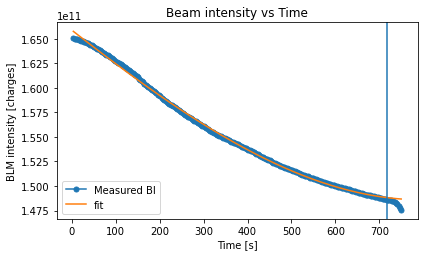

In [22]:
for i in range(len(t)):
	if actualpos[i] == norm_l1:
		t1 = t[i]
	if actualpos[i] == norm_l2:
		t2 = t[i]
t_lim = (t1+t2)/2.

t_fit = []
beamint_fit = []

for i in range(len(t)):
	if t[i] <= t_lim:
		t_fit.append(t[i])
		beamint_fit.append(beamint[i])

theta = [i for i in Ttheta]
# theta = [i-Ttheta[-1] for i in Ttheta]

# for i in range(len(beamint)-0):
#	t_ifit.append(t[i])
#	beamint_ifit.append(beamint[i])

f0 = plt.figure(0)
plt.title('Beam intensity vs Time')
plt.plot(t, beamint, label='Measured BI', marker='o', markersize=5)
p = np.polyfit(t_fit, beamint_fit, 3)
# p = np.polyfit(t_fit, beamint_fit, 5)
y = np.polyval(p, t)
plt.plot(t, y, label='fit')
plt.xlabel('Time [s]')
plt.ylabel('BLM intensity [charges]')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()
plt.axvline(t_lim)

f0.show()
f0.tight_layout(rect=[0, 0.03, 1, 0.95])

In [23]:
t

array([  3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,  33.,
        36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,  66.,
        69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,  99.,
       102., 105., 108., 111., 114., 117., 120., 123., 126., 129., 132.,
       135., 138., 141., 144., 147., 150., 153., 156., 159., 162., 165.,
       168., 171., 174., 177., 180., 183., 186., 189., 192., 195., 198.,
       201., 204., 207., 210., 213., 216., 219., 222., 225., 228., 231.,
       234., 237., 240., 243., 246., 249., 252., 255., 258., 261., 264.,
       267., 270., 273., 276., 279., 282., 285., 288., 291., 294., 297.,
       300., 303., 306., 309., 312., 315., 318., 321., 324., 327., 330.,
       333., 336., 339., 342., 345., 348., 351., 354., 357., 360., 363.,
       366., 369., 372., 375., 378., 381., 384., 387., 390., 393., 396.,
       399., 402., 405., 408., 411., 414., 417., 420., 423., 426., 429.,
       432., 435., 438., 441., 444., 447., 450., 45

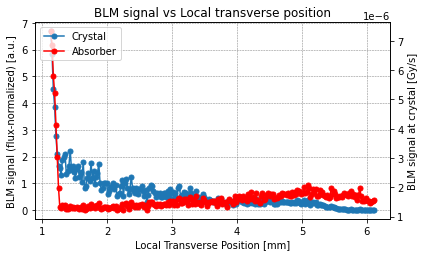

In [24]:
q = np.polyder(p)
signalblm_norm = []
errblm_norm = []
for i in range(len(t)):
	if actualpos[i] == norm_l1:
		norm_s1 = signalblm[i]/np.polyval(q,t[i])
	if actualpos[i] == norm_l2:
		norm_s2 = signalblm[i]/np.polyval(q,t[i])
normal = (norm_s1+norm_s2)/2.
norm_l = (norm_l1+norm_l2)/2.
# normal = normal*2.5/5
# print normal

count_norm = 0
mean_norm = []
for i in range(len(actualpos)):
    #if actualpos[i] <= norm_l and actualpos[i] >= norm_l-meanlim:
    if actualpos[i] >= norm_l and actualpos[i] <= norm_l + meanlim:
        mean_norm.append(signalblm[i]/np.polyval(q,t[i]))
        count_norm += 1
normal = sum(mean_norm)/count_norm

for i in range(len(t)):
	signalblm_norm.append(signalblm[i]/abs(np.polyval(q,t[i])*normal))
	errblm_norm.append(errblm[i]/abs(np.polyval(q,t[i])*normal))

f1 = plt.figure(1)
ax3 = f1.add_subplot(111)
ax4 = ax3.twinx()
plt.title('BLM signal vs Local transverse position')
ax3.plot(actualpos, signalblm_norm, marker='o', markersize=5, label='Crystal')
ax4.plot(actualpos, signalcry, marker='o', markersize=5, color='red', label='Absorber')
ax3.set_xlabel('Local Transverse Position [mm]')
ax3.set_ylabel('BLM signal (flux-normalized) [a.u.]')
ax4.set_ylabel('BLM signal at crystal [Gy/s]')
ax3.grid(color='gray', linestyle='--', linewidth=0.5)
ax4.yaxis.grid(False)
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
plt.legend(lines3+lines4, labels3+labels4, fontsize=10, loc=2)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

f1.show()
f1.tight_layout(rect=[0, 0.03, 1, 0.95])

In [25]:
CollPos[2]-CollPos[1]

-0.019999999999999574

Height:  0.2908087181156358  a.u.
Mean:  5.330654239443608  mm
Sigma:  0.20675854751551245  mm
Calculated theta [urad]:  64.402


/tmp/ipykernel_1378/1327431399.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([int(abs(tick)) for tick in ticks])


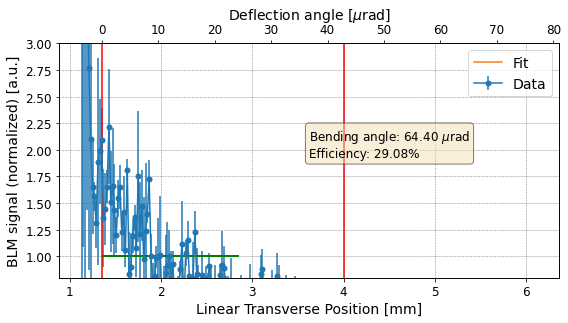

In [26]:
f2, ax1 = plt.subplots(figsize=(8,5))
# plt.title('BLM signal vs Local transverse position of absorber', fontsize=14, y=1.20)

actualpos_filt = []
signalblm_filt = []
errblm_filt = []
for i in range(len(actualpos)):
    if (actualpos[i]>maxfit):
        actualpos_filt.append(actualpos[i])
        signalblm_filt.append(signalblm_norm[i])
        errblm_filt.append(errblm_norm[i])

params, extras = opt.curve_fit(erfunc, actualpos_filt, signalblm_filt, p0=param0, sigma=errblm_filt)

print('Height: ', abs(params[1]), ' a.u.')
print('Mean: ', params[2], ' mm')
print('Sigma: ', abs(params[3]), ' mm')

signalblm_notnorm=[]
for i in signalblm_norm:
    signalblm_notnorm.append(i*normal)

with open(oScanNorm,'w') as oFile:
    oFile.write('# Pos SignalBLM SignalBLMNorm\n')
    writer = csv.writer(oFile,delimiter='\t')
    writer.writerows(zip(actualpos,signalblm_notnorm,signalblm_norm))

#for i in range(len(signalblm_norm)):
#if round(signalblm_norm[i],5)==1:
#xenv = abs(actualpos[i])
if config == 'B2V' and scan == '3':
    xenv = 1.163
else:
    xenv = abs(norm_l)
xdef = abs(params[2])
deltax = (xdef-xenv)*1.0e-3

theta_calc = (deltax-sigma1*np.sqrt(emittance*beta2)*(np.cos(deltaphi)-1))/(np.sqrt(beta2*beta1)*np.sin(deltaphi))
print('Calculated theta [urad]: ', round(theta_calc*1.0e6,3))
# print deltax, emittance
# print beta2, beta1, deltaphi

x1 = -xenv
y1 = 0
x2 = -xdef
y2 = theta_calc*1.0e6
m = (y2-y1)/(x2-x1)
q = y1-m*x1


actualpos_pos = [i for i in actualpos]
actualpos_conv = [m*(-i)+q for i in actualpos_pos]

# ax1.plot(actualpos, abs(params[1])*norm.pdf(actualpos,params[2],abs(params[3])), label='Ch beam profile', color='green')
ax3 = ax1.twiny()
ax1.errorbar(actualpos_pos, signalblm_norm, yerr=errblm_norm, label='Data', marker='o', markersize=5)
ax1.plot(actualpos_pos, erfunc(actualpos, *params), label='Fit', zorder=10)
ax3.plot(actualpos_conv, signalblm_norm, alpha=0.0)
ticks = ax3.get_xticks()
ax3.set_xticklabels([int(abs(tick)) for tick in ticks])
ax1.tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel('Linear Transverse Position [mm]', fontsize=14)
ax1.set_ylabel('BLM signal (normalized) [a.u.]', fontsize=14)
# ax1.set_ylabel('Channeled beam profile [a.u.]', fontsize=12)
ax3.set_xlabel('Deflection angle [$\mu$rad]', fontsize=14)
ax1.hlines(y=1, xmin=norm_l, xmax=norm_l+meanlim, linewidth=2, color='green')
# ax1.get_yaxis().set_visible(False)
if config == 'B2V' and scan == '3':
	ax1.set_ylim(0,5)
else:
    ax1.set_ylim(0,2.5)
    #ax1.set_ylim(0,1.5)
ax1.grid(color='gray', linestyle='--', linewidth=0.5)
# ax1.yaxis.grid(False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
lines1, labels1 = ax1.get_legend_handles_labels()
plt.legend(lines1, labels1, fontsize=14, loc=1)
ax1.grid(color='gray', linestyle='--', linewidth=0.5)
textstr = 'Bending angle: %.2f $\mu$rad\nEfficiency: %.2f' % (round(theta_calc*1.0e6,3),round(abs(params[1])*100,2),)+'%'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.5, 0.5, textstr, transform=ax1.transAxes, fontsize=12, verticalalignment='bottom', bbox=props)

#|ax1.set_xlim(5,6)
ax1.set_ylim(0.8,3)
ax1.axvline(maxfit, color = "r")
ax1.axvline(norm_l, color= "r")
f2.show()
f2.tight_layout(rect=[0, 0.03, 1, 0.95])

Height:  0.2908087181156358  a.u.
Mean:  5.330654239443608  mm
Sigma:  0.20675854751551245  mm
Calculated theta [urad]:  64.402


/tmp/ipykernel_1378/2892072188.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([int(abs(tick)) for tick in ticks])


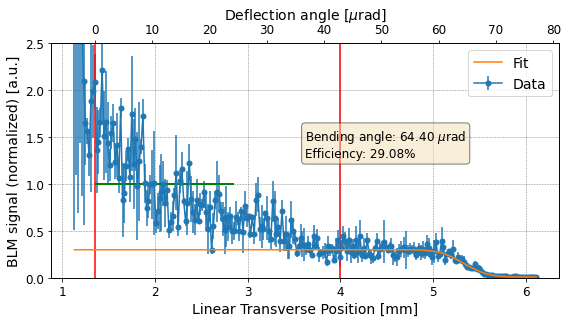

In [29]:
f2, ax1 = plt.subplots(figsize=(8,5))
# plt.title('BLM signal vs Local transverse position of absorber', fontsize=14, y=1.20)

actualpos_filt = []
signalblm_filt = []
errblm_filt = []
for i in range(len(actualpos)):
    if (actualpos[i]>maxfit):
        actualpos_filt.append(actualpos[i])
        signalblm_filt.append(signalblm_norm[i])
        errblm_filt.append(errblm_norm[i])

params, extras = opt.curve_fit(erfunc, actualpos_filt, signalblm_filt, p0=param0, sigma=errblm_filt)

print('Height: ', abs(params[1]), ' a.u.')
print('Mean: ', params[2], ' mm')
print('Sigma: ', abs(params[3]), ' mm')

signalblm_notnorm=[]
for i in signalblm_norm:
    signalblm_notnorm.append(i*normal)

with open(oScanNorm,'w') as oFile:
    oFile.write('# Pos SignalBLM SignalBLMNorm\n')
    writer = csv.writer(oFile,delimiter='\t')
    writer.writerows(zip(actualpos,signalblm_notnorm,signalblm_norm))

#for i in range(len(signalblm_norm)):
#if round(signalblm_norm[i],5)==1:
#xenv = abs(actualpos[i])
if config == 'B2V' and scan == '3':
    xenv = 1.163
else:
    xenv = abs(norm_l)
xdef = abs(params[2])
deltax = (xdef-xenv)*1.0e-3

theta_calc = (deltax-sigma1*np.sqrt(emittance*beta2)*(np.cos(deltaphi)-1))/(np.sqrt(beta2*beta1)*np.sin(deltaphi))
print('Calculated theta [urad]: ', round(theta_calc*1.0e6,3))
# print deltax, emittance
# print beta2, beta1, deltaphi

x1 = -xenv
y1 = 0
x2 = -xdef
y2 = theta_calc*1.0e6
m = (y2-y1)/(x2-x1)
q = y1-m*x1


actualpos_pos = [i for i in actualpos]
actualpos_conv = [m*(-i)+q for i in actualpos_pos]

# ax1.plot(actualpos, abs(params[1])*norm.pdf(actualpos,params[2],abs(params[3])), label='Ch beam profile', color='green')
ax3 = ax1.twiny()
ax1.errorbar(actualpos_pos, signalblm_norm, yerr=errblm_norm, label='Data', marker='o', markersize=5)
ax1.plot(actualpos_pos, erfunc(actualpos, *params), label='Fit', zorder=10)
ax3.plot(actualpos_conv, signalblm_norm, alpha=0.0)
ticks = ax3.get_xticks()
ax3.set_xticklabels([int(abs(tick)) for tick in ticks])
ax1.tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel('Linear Transverse Position [mm]', fontsize=14)
ax1.set_ylabel('BLM signal (normalized) [a.u.]', fontsize=14)
# ax1.set_ylabel('Channeled beam profile [a.u.]', fontsize=12)
ax3.set_xlabel('Deflection angle [$\mu$rad]', fontsize=14)
ax1.hlines(y=1, xmin=norm_l, xmax=norm_l+meanlim, linewidth=2, color='green')
# ax1.get_yaxis().set_visible(False)
if config == 'B2V' and scan == '3':
	ax1.set_ylim(0,5)
else:
    ax1.set_ylim(0,2.5)
    #ax1.set_ylim(0,1.5)
ax1.grid(color='gray', linestyle='--', linewidth=0.5)
# ax1.yaxis.grid(False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
lines1, labels1 = ax1.get_legend_handles_labels()
plt.legend(lines1, labels1, fontsize=14, loc=1)
ax1.grid(color='gray', linestyle='--', linewidth=0.5)
textstr = 'Bending angle: %.2f $\mu$rad\nEfficiency: %.2f' % (round(theta_calc*1.0e6,3),round(abs(params[1])*100,2),)+'%'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.5, 0.5, textstr, transform=ax1.transAxes, fontsize=12, verticalalignment='bottom', bbox=props)

#|ax1.set_xlim(5,6)
#ax1.set_ylim(0.8,3)
ax1.axvline(maxfit, color = "r")
ax1.axvline(norm_l, color= "r")
f2.show()
f2.tight_layout(rect=[0, 0.03, 1, 0.95])

In [27]:
params[1]

-0.2908087181156358

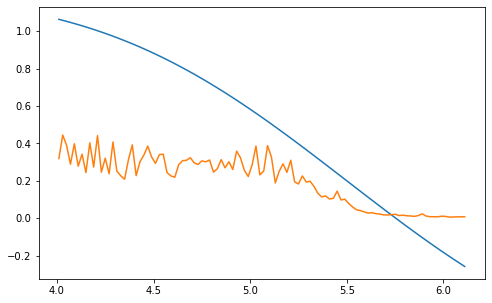

In [28]:
"""	center2 = 0.3
	param0 = [0.2,2,-5.5,1.0]
	param0_2 = [0.0,1,-65.0,0.1]
	meanlim = 1.5
	scan = raw_input('Which scan? (1-2): ')
	if (scan == '1'):
		tMin_bkg = '2022-07-22 16:18:19.000'
		tMax_bkg = '2022-07-22 16:19:47.000'
		tMin = '2022-07-22 16:23:40.000'
		tMax = '2022-07-22 16:36:12.000'
		norm_l1 = -1.35
		norm_l2 = -1.35
		maxfit = -4.0"""

"""	param0 = [0.2,-2,5.5,1.0]
	param0_2 = [0.0,1,-65.0,0.1]
	meanlim = 1.5
	if (scan == '1'):
		tMin_bkg = '2022-07-22 16:18:19.000'
		tMax_bkg = '2022-07-22 16:19:47.000'
		tMin = '2022-07-22 16:23:40.000'
		tMax = '2022-07-22 16:36:12.000'
		norm_l1 = 1.35
		norm_l2 = 1.35
		maxfit = 4.0"""

fig, ax = plt.subplots(figsize=(8,5))
x = np.linspace(min(actualpos_filt), max(actualpos_filt), 100)
#x = np.linspace(-10, 0,  1000)
#x = np.linspace(0, 10,  1000)

ax.plot(x, erfunc(x, param0[0], param0[1], param0[2], param0[3]))
#ax.axhline(0, color = 'r')
#ax.axhline(1, color = 'r')
#ax.axvline(PosEnvelope-RangetoMeanEnv[0], color = 'g')
#ax.axvline(PosEnvelope+RangetoMeanEnv[1], color = 'g')
#ax.axvline(PosEnvelope, color = 'r')
ax.plot(actualpos_filt, signalblm_filt)
#ax.axvline(PosMaxErfFit, color = 'r', linestyle = '--')
#ax.set_ylim(0,1.5)
